# 1.1 単回帰

In [1]:
using Distributions
using Random
using LinearAlgebra
using Plots
using StatsBase
using LaTeXStrings
using ProgressBars
using DataFrames
using CSV
using Base.Threads
gr()

Plots.GRBackend()

In [19]:
function make_data()
    """
    データの作成関数
    y = 2x + 1 に N(0,1)のノイズを追加してデータ作成
    """

    number_of_data = 50
    x = collect(range(-5, 5, length=number_of_data))
    y = 2 * x .+ 1 + rand(Normal(0,1),number_of_data)

    return x, y
end

make_data (generic function with 1 method)

In [7]:
function make_design_matrix(x)
    """
    計画行列作成関数

    Parameters
    ----------
    x : list of float
        1次元データ

    Returns
    -------
    design_mat : matrix of float
        計画行列
    """

    design_mat = hcat(ones(length(x)), x)

    return design_mat
end

make_design_matrix (generic function with 1 method)

In [8]:
function simple_regression(design_mat, y)
    """
    パラメータ推定関数

    Parameters
    ----------
    design_mat : matrix of float
        計画行列
    y : list of float
        1次元データ
    
    Returns
    -------
    w : list of float
        単回帰モデルの解
    """

    w = (design_mat' * design_mat) \ design_mat' * y

    return w
end

simple_regression (generic function with 1 method)

In [9]:
function estimate_func(design_mat, w)
    """
    推定値出力関数

    Parameters
    ----------
    design_mat : matrix of float
        計画行列
    w : list of float
        単回帰モデルの解

    Returns
    -------
    y_hat : list of float
        推定値
    """

    y_hat = design_mat * w

    return y_hat
end

estimate_func (generic function with 1 method)

In [25]:
function main()

    x, y = make_data()
    design_mat = make_design_matrix(x)
    w = simple_regression(design_mat, y)
    y_hat = estimate_func(design_mat, w)

    #パラメータ推定値(1,2が正解)
    print("パラメータ推定値((1,2)を元にデータ生成):",w)
    
    #可視化
    plot(x,y,label="data")
    plot!(x,y_hat,label="estimate")
    plot!(xlabel=L"x",ylabel=L"y",legend=:bottomright)
end

main (generic function with 1 method)

パラメータ推定値((1,2)を元にデータ生成):[0.6634360575603329, 2.0411413100617226]

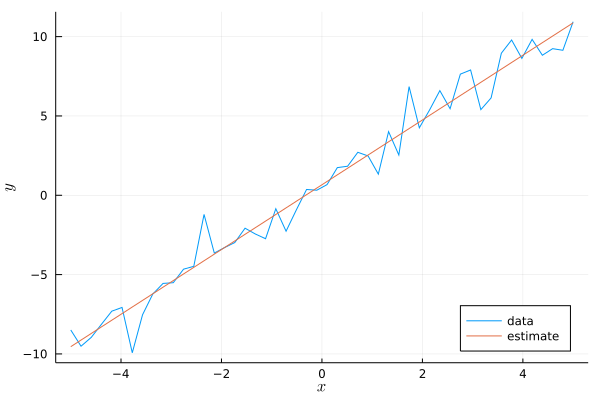

In [26]:
main()